In [19]:
import numpy as np
import cygnus_lib as cy
import matplotlib.pyplot as plt
import mylib as my
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import scipy.stats as stats
%matplotlib inline
x_resolution = y_resolution = 2048
from itertools import combinations
pixelscale  = 0.125 #55e-3 #Orange 0.125 for lemonn mm/pixel
from skimage.measure import LineModelND, CircleModel, ransac
import os
import requests
import ROOT
import root_numpy as rtnp
ROOT.gROOT.SetBatch(True)

# read ROOT file

In [107]:
run         = 3569
dataSelection = 'LAB'
print ('Download and open file: '+cy.swift_root_file(dataSelection, run))
tmp_file = cy.swift_download_file(cy.swift_root_file(dataSelection, run))
print ('Open file: '+tmp_file)
f  = ROOT.TFile.Open(tmp_file);
print ('Find Keys: '+str(len(f.GetListOfKeys())))
pic, wfm = cy.root_TH2_name(f)
max_image = len(pic)
max_wfm = len(wfm)
print ("# of Images (TH2) Files: %d " % (max_image))
print ("# of Waveform (TH2) Files: %d " % (max_wfm))
nImag=max_image

Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run03569.root


  3.9%   5365760 / 138957048

  8.2%  11386880 / 138957048

 12.5%  17424384 / 138957048

 16.7%  23142400 / 138957048

 20.8%  28884992 / 138957048

 25.0%  34701312 / 138957048

 29.2%  40624128 / 138957048

 33.6%  46628864 / 138957048

 37.8%  52592640 / 138957048

 41.2%  57311232 / 138957048

 43.8%  60932096 / 138957048

 46.5%  64651264 / 138957048

 49.2%  68419584 / 138957048

 52.0%  72212480 / 138957048

 54.8%  76111872 / 138957048

 57.6%  80052224 / 138957048

 60.4%  83886080 / 138957048

 63.1%  87678976 / 138957048

 65.9%  91578368 / 138957048

 68.7%  95436800 / 138957048

 71.5%  99328000 / 138957048

 74.3% 103178240 / 138957048

 77.1% 107102208 / 138957048

 79.8% 110919680 / 138957048

 82.6% 114712576 / 138957048

 85.3% 118480896 / 138957048

 87.8% 122036224 / 138957048

 90.4% 125681664 / 138957048

 93.3% 129712128 / 138957048

 96.2% 133611520 / 138957048

 99.0% 137502720 / 138957048

Open file: ./tmp.29867.root
Find Keys: 93
# of Images (TH2) Files: 31 
# of Waveform (TH2) Files: 31 


100.0% 138960896 / 138957048


read RROT image

In [108]:
nsigma      = 1
traccia     = 2 
cimax       = 130
cimin       = 95# 85
image = rtnp.hist2array(f.Get(pic[traccia])).T
#image  = rtnp.hist2array(f.Get(imageName[traccia])).T 

In [109]:
run_ped = 3523
try:
    fileoutm = ("./data/run%d_mean.h5" % (run_ped))
    m_image = cy.read_image_h5(fileoutm)
    PedOverMax = m_image[m_image > cimax].size
    print ("Pedestal mean: %.2f, sigma: %.2f, over th. (%d) %d" % 
       (m_image[m_image<cimax].mean(), 
        np.sqrt(m_image[m_image<cimax].var()), cimax,
        (m_image>cimax).sum()))
except:
    print ("No Pedestal file for run %s, run script runs-pedestals.ipynb" % run_ped)
    print ("STOP")

try: 
    fileouts = ("./data/run%d_sigma.h5" % (run_ped))
    s_image = cy.read_image_h5(fileouts)
    print ("Sigma mean: %.2f, sigma: %.2f, over th. (50) %d" % 
   (s_image[s_image<50].mean(), 
    np.sqrt(s_image[s_image<50].var()), 
    (s_image>50).sum()))
except:
    print ("No Sigma file for run %s, run script runs-pedestals.ipynb" % run_ped)
    print ("STOP")

th_image    = np.round(m_image + nsigma*s_image)

Pedestal mean: 99.80, sigma: 2.02, over th. (130) 7706
Sigma mean: 2.79, sigma: 2.32, over th. (50) 533


# show Imege

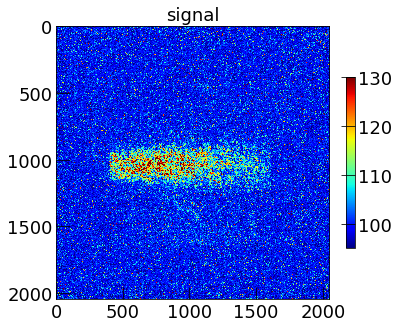

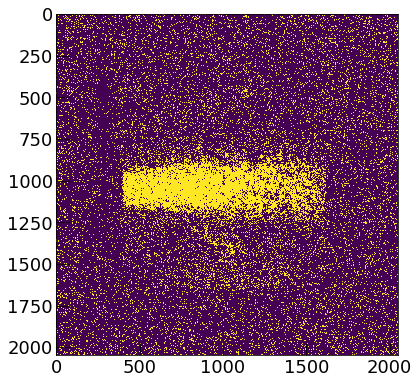

In [110]:
cy.set_atlas_style("square")
#print (nsigma, th_image)
plt.imshow(image, vmin=cimin,vmax=cimax, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("signal")
plt.show()
edges     = (image > th_image)
plt.imshow(edges, vmin=0,vmax=1)
plt.show()

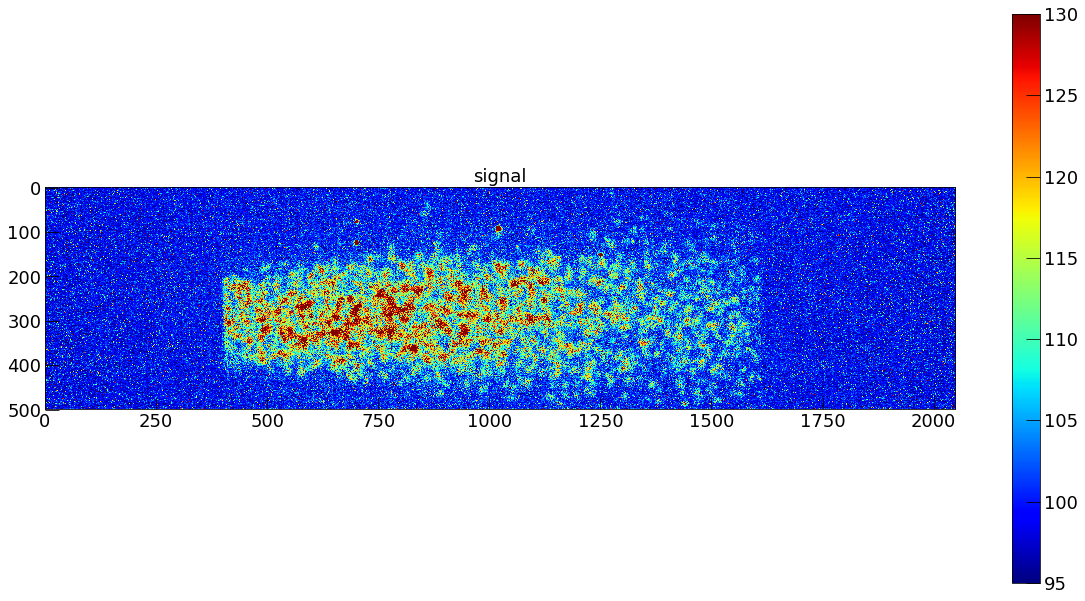

In [111]:
cy.set_atlas_style("large")
image1 = image[750:1250,]
plt.imshow(image1, vmin=cimin,vmax=cimax, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("signal")
plt.show()

Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run03564.root


  2.9%   3825664 / 133580374

  5.8%   7806976 / 133580374

  8.9%  11935744 / 133580374

 11.8%  15704064 / 133580374

 14.6%  19472384 / 133580374

 17.8%  23814144 / 133580374

 22.3%  29818880 / 133580374

 25.7%  34390016 / 133580374

 29.0%  38690816 / 133580374

 32.3%  43098112 / 133580374

 35.4%  47276032 / 133580374

 38.2%  51036160 / 133580374

 40.9%  54689792 / 133580374

 44.0%  58777600 / 133580374

 47.0%  62816256 / 133580374

 50.0%  66764800 / 133580374

 53.0%  70787072 / 133580374

 55.9%  74727424 / 133580374

 58.9%  78716928 / 133580374

 61.9%  82722816 / 133580374

 64.9%  86646784 / 133580374

 67.7%  90488832 / 133580374

 70.8%  94552064 / 133580374

 73.8%  98541568 / 133580374

 76.7% 102490112 / 133580374

 79.7% 106430464 / 133580374

 82.7% 110411776 / 133580374

 85.6% 114352128 / 133580374

 88.3% 117891072 / 133580374

 91.0% 121585664 / 133580374

 94.0% 125566976 / 133580374

 97.1% 129695744 / 133580374

100.0% 133586944 / 133580374


Open file: ./tmp.29867.root
Find Keys: 93
# of Images (TH2) Files: 31 
# of Waveform (TH2) Files: 31 
0  >> Close and re-Open:  ./tmp.29867.root
A, M, S : 5.00 1580460.52 94408.58
A, Mean, Sigma : 3.41 1561248.98 67700.28


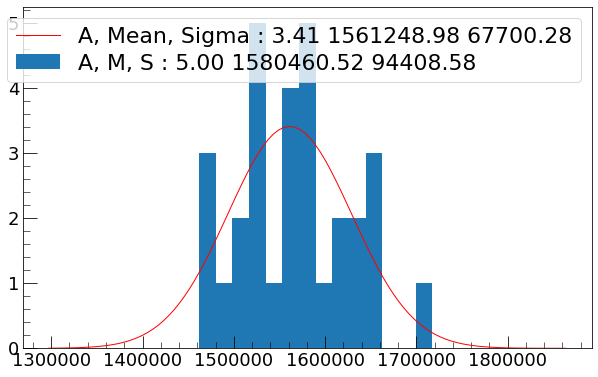

>> File ./tmp.29867.root removed
Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run03565.root


  5.5%   7290880 / 133622712

 13.7%  18366464 / 133622712

 20.4%  27279360 / 133622712

 25.9%  34578432 / 133622712

 32.1%  42958848 / 133622712

 38.5%  51453952 / 133622712

 44.9%  59932672 / 133622712

 51.3%  68583424 / 133622712

 59.6%  79650816 / 133622712

 70.1%  93700096 / 133622712

 80.8% 107962368 / 133622712

 91.4% 122150912 / 133622712

 97.8% 130686976 / 133622712

100.0% 133627904 / 133622712


Open file: ./tmp.29867.root
Find Keys: 93
# of Images (TH2) Files: 31 
# of Waveform (TH2) Files: 31 
0  >> Close and re-Open:  ./tmp.29867.root
A, M, S : 9.00 1409327.23 114887.10
A, Mean, Sigma : 6.47 1384267.93 44213.17


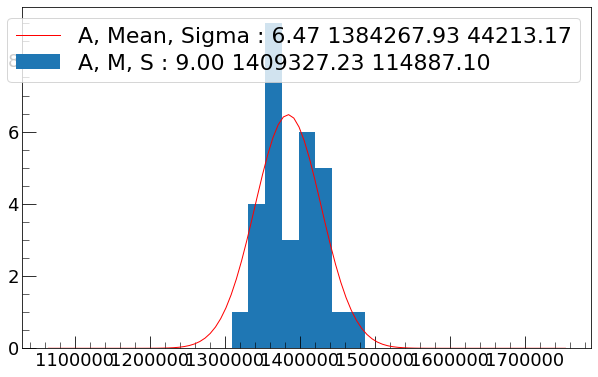

>> File ./tmp.29867.root removed
Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run03566.root


  4.0%   5382144 / 133830947

  8.7%  11599872 / 133830947

 13.2%  17629184 / 133830947

 17.7%  23625728 / 133830947

 22.2%  29736960 / 133830947

 26.7%  35708928 / 133830947

 31.0%  41525248 / 133830947

 35.4%  47407104 / 133830947

 39.8%  53305344 / 133830947

 44.2%  59211776 / 133830947

 48.6%  65069056 / 133830947

 53.1%  71090176 / 133830947

 57.6%  77029376 / 133830947

 62.0%  83034112 / 133830947

 65.1%  87162880 / 133830947

 68.0%  90939392 / 133830947

 70.8%  94756864 / 133830947

 73.7%  98639872 / 133830947

 76.5% 102400000 / 133830947

 80.3% 107429888 / 133830947

 84.7% 113336320 / 133830947

 88.8% 118841344 / 133830947

 93.8% 125485056 / 133830947

 98.2% 131399680 / 133830947

100.0% 133832704 / 133830947


Open file: ./tmp.29867.root
Find Keys: 93
# of Images (TH2) Files: 31 
# of Waveform (TH2) Files: 31 
0  >> Close and re-Open:  ./tmp.29867.root
A, M, S : 9.00 1445936.23 105044.10
A, Mean, Sigma : 7.63 1427464.63 32917.09


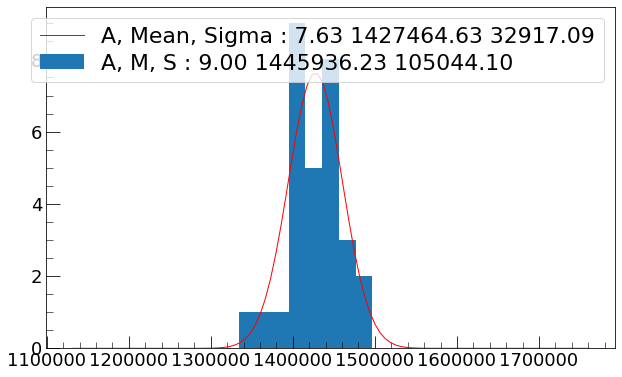

>> File ./tmp.29867.root removed
Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run03567.root


  4.7%   6340608 / 134570141

 13.6%  18333696 / 134570141

 20.7%  27820032 / 134570141

 28.4%  38191104 / 134570141

 36.4%  48922624 / 134570141

 43.2%  58081280 / 134570141

 50.9%  68460544 / 134570141

 59.0%  79405056 / 134570141

 67.2%  90398720 / 134570141

 75.4% 101408768 / 134570141

 83.4% 112230400 / 134570141

 91.8% 123527168 / 134570141

100.0% 134578176 / 134570141


Open file: ./tmp.29867.root
Find Keys: 93
# of Images (TH2) Files: 31 
# of Waveform (TH2) Files: 31 
0  >> Close and re-Open:  ./tmp.29867.root
A, M, S : 5.00 2077801.97 109126.59
A, Mean, Sigma : 4.08 2070443.93 64574.94


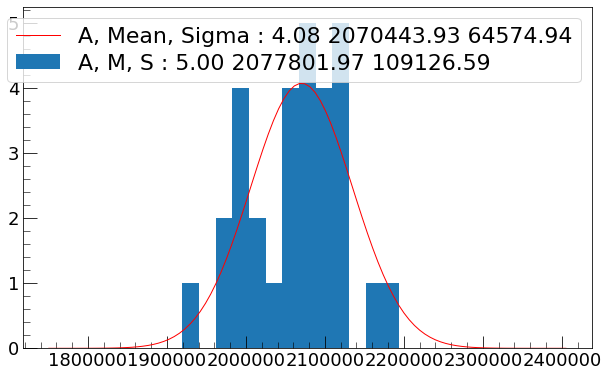

>> File ./tmp.29867.root removed
Download and open file: https://swift.cloud.infn.it:8080/v1/AUTH_1e60fe39fba04701aa5ffc0b97871ed8/Cygnus/Data/LAB/histograms_Run03569.root


  3.0%   4104192 / 138957048

  4.8%   6651904 / 138957048

  7.7%  10706944 / 138957048

 10.6%  14761984 / 138957048

 13.4%  18677760 / 138957048

 16.4%  22724608 / 138957048

 21.4%  29712384 / 138957048

 25.9%  36044800 / 138957048

 28.0%  38961152 / 138957048

 30.3%  42074112 / 138957048

 33.2%  46137344 / 138957048

 35.0%  48627712 / 138957048

100.0% 138960896 / 138957048


Open file: ./tmp.29867.root
Find Keys: 93
# of Images (TH2) Files: 31 
# of Waveform (TH2) Files: 31 
0  >> Close and re-Open:  ./tmp.29867.root
A, M, S : 10.00 4387599.77 948267.61
A, Mean, Sigma : 10.97 3769706.01 157864.54


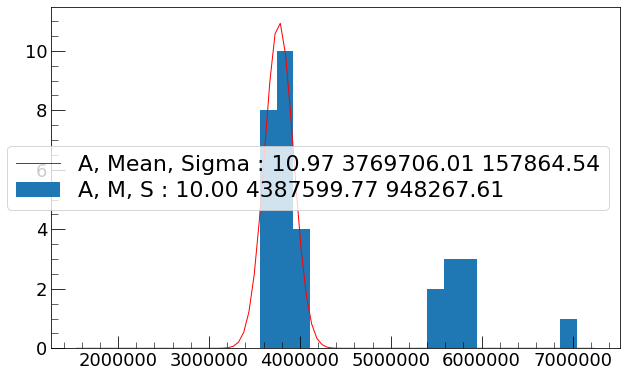

>> File ./tmp.29867.root removed


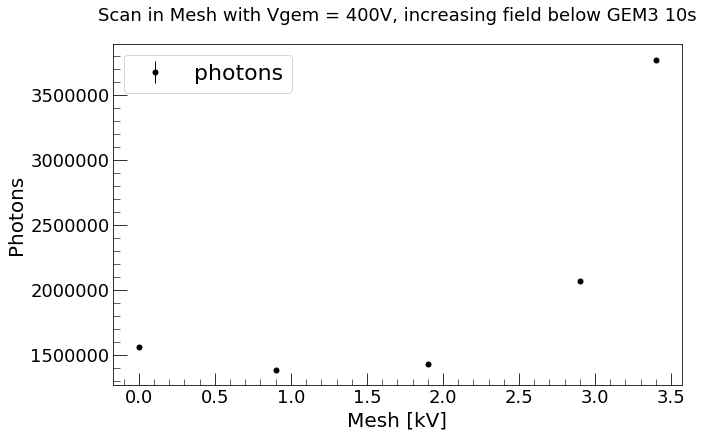

In [95]:
cy.set_atlas_style()
title ='Scan in Mesh with Vgem = 380V 10s'
hv  = [0.5,1.0,1.5,2.0,2.5,3.0]
run = [3525, 3526, 3527, 3529, 3530, 3531]
title ='Scan in Mesh with Vgem = 400V 10s'
hv  = [3.0,2.5,2.0,1.5,1.0,0.5,0.0]
run = [3532, 3533, 3534, 3535, 3536, 3537, 3538]

title = 'Scan in Mesh with Vgem = 400V, increasing field below GEM3 10s'
hv  = [0.0,0.9,1.9,2.9,3.4]
run = [3564, 3565, 3566, 3567, 3569]


#title = 'Scan in Mesh with Vgem = 400V images 300 ms'
#hv  = [0.0,0.5,1.0,1.5,2.0,2.5,3.0]
#run = [3540, 3541, 3542, 3543, 3544, 3545, 3546]
#title = 'Scan in Mesh with Vgem = 400V images 300 ms 2 HR'
#hv  = [0.0,0.5,1.0,1.5,2.0,2.5,3.0]
#run = [3556, 3557, 3558, 3559, 3560, 3561, 3562]

dataSelection = 'LAB'
l_m = []
l_s = []
l_l = []
for i in range(0,len(run)):
    
    print ('Download and open file: '+cy.swift_root_file(dataSelection, run[i]))
    tmp_file = cy.swift_download_file(cy.swift_root_file(dataSelection, run[i]))
    print ('Open file: '+tmp_file)
    f  = ROOT.TFile.Open(tmp_file);
    print ('Find Keys: '+str(len(f.GetListOfKeys())))
    pic, wfm = cy.root_TH2_name(f)
    max_image = len(pic)
    max_wfm = len(wfm)
    print ("# of Images (TH2) Files: %d " % (max_image))
    print ("# of Waveform (TH2) Files: %d " % (max_wfm))
    nImag=max_image
    h = []
    for iTr in range(0, max_image):
        #
        ##### WARINING next trik has been introduced beocouse of memory garbage og Get ROOT function
        # 150 can be trimmed
        #
        if iTr % 150 == 0:
            print (iTr, ' >> Close and re-Open: ', tmp_file)
            f.Close()
            f  = ROOT.TFile.Open(tmp_file);
        #############################################################################################
        image = rtnp.hist2array(f.Get(pic[iTr])).T
        image1 = (image - m_image)[750:1250,]
        #print (image1.sum())
        h = np.append(h, image1.sum())
        # plt.imshow(image1, vmin=cimin,vmax=cimax, cmap='jet')
        # plt.colorbar(shrink=0.5)
        # plt.title("signal")
        # plt.show()
    #plt.hist(h,len(h))
    M, S = h.mean(), h.std()
    x = np.linspace(M-3*S, M+3*S, len(h))
    
    yh, _ = np.histogram(h, len(h), range=(M-3*S, M+3*S))
    A = yh.max()
    #plt.hist(h, 100)
    plt.hist(h, len(h), label=('A, M, S : {0:.2f} {1:.2f} {2:.2f}'.format(A, M, S)), range=(M-3*S, M+3*S))
    print ('A, M, S : {0:.2f} {1:.2f} {2:.2f}'.format(A, M, S))
    try:
        fcTL, pcov = curve_fit(my.Gauss3, x, yh, p0=(A, M, S))
        
        x = np.linspace(M-3*S, M+3*S, 100)
        plt.plot(x, my.Gauss3(x, *fcTL), 'r-', 
             label=('A, Mean, Sigma : {0:.2f} {1:.2f} {2:.2f}'.format(fcTL[0], fcTL[1], fcTL[2])))
        print ('A, Mean, Sigma : {0:.2f} {1:.2f} {2:.2f}'.format(fcTL[0], fcTL[1], fcTL[2]))
    except:
        fcTL = [A, M, S]
        print ('>>> Waning... invalid fit')
    #
    l_m = np.append(l_m, fcTL[1])
    l_s = np.append(l_s, fcTL[2])
    l_l = np.append(l_l, len(h))
    plt.minorticks_on()
    plt.legend()
    plt.show()
    if not cy.rm_file(tmp_file):
        print (">> File "+tmp_file+" removed")
plt.errorbar(hv,l_m, yerr=l_s/l_l, fmt='k.',  markersize=10, label='photons')
#plt.plot(hv,l_m)
plt.minorticks_on()
plt.legend()
plt.title(title,  y=1.05)
plt.ylabel('Photons')
plt.xlabel('Mesh [kV]')
plt.show()


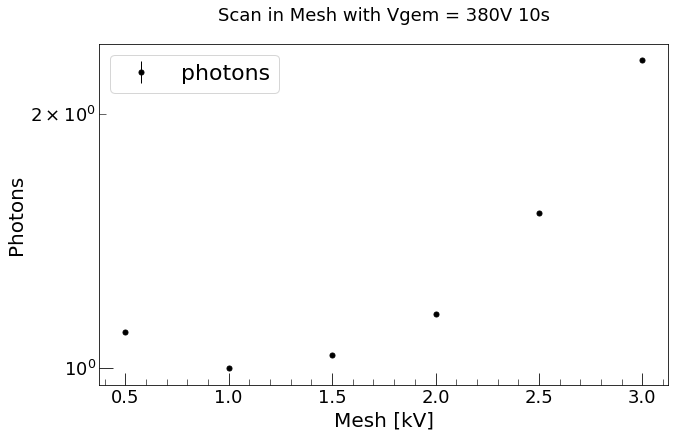

In [46]:
# print(l_m.min())
e = (l_s/l_l)/l_m.min()
plt.errorbar(hv,(l_m/l_m.min()), yerr=e, fmt='k.',  markersize=10, label='photons')

plt.minorticks_on()
plt.legend()
plt.title(title,  y=1.05)
#plt.ylim(0.1,10)
plt.ylabel('Photons')
plt.xlabel('Mesh [kV]')
plt.yscale('log')
plt.show()

In [47]:
title1 = title
l_m0 = l_m
l_s0 = l_s
l_l0 = l_l

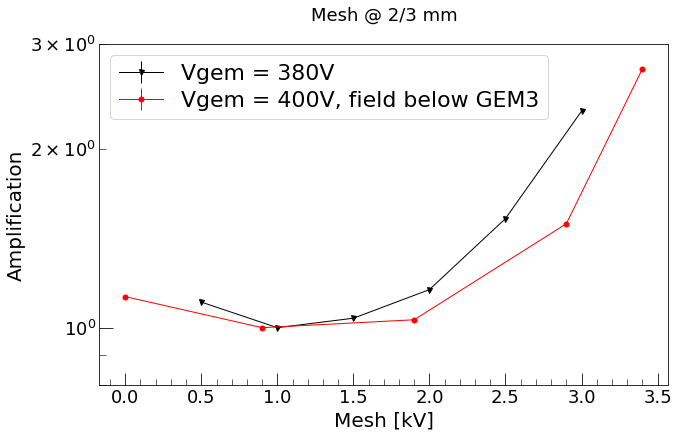

In [98]:
hv  = [0.5,1.0,1.5,2.0,2.5,3.0]
e = (l_s0/l_l0)/l_m0.min()
plt.errorbar(hv,(l_m0/l_m0.min()), yerr=e, fmt='k-v',  markersize=5, label='Vgem = 380V')
#hv  = [3.0,2.5,2.0,1.5,1.0,0.5,0.0]
#y   = (l_m1/l_m1.min())
#e = (l_s1/l_l1)/l_m1.min()
#e = e[y<10.]
##hv = hv[(y<10.)]
#y = y[y<10.]
#hv  = [3.0, 1.5, 1.0, 0.0]
#
#plt.errorbar(hv,y, yerr=e, fmt='r-.',  markersize=10, label='Vgem = 400V')
hv  = [0.0,0.9,1.9,2.9,3.4]
e = (l_s2/l_l2)/l_m2.min()
plt.errorbar(hv,(l_m2/l_m2.min()), yerr=e, fmt='r-o',  markersize=5, label='Vgem = 400V, field below GEM3')

plt.minorticks_on()
plt.legend(loc=2)
plt.title('Mesh @ 2/3 mm',  y=1.05)
plt.ylim(0.8,3)
plt.ylabel('Amplification')
plt.xlabel('Mesh [kV]')
plt.yscale('log')
plt.savefig('./mesh.pdf', format='pdf')
plt.show()

In [ ]:
cy.set_atlas_style("long")
Yproj       = np.mean(image, axis=1)
x = np.arange(0, image.shape[0])
x0 = 1013
plt.axvline(x=200)
plt.axvline(x=200+30)
print("main bck off image: %.2f" % Yproj[200:230].mean())
print("main track: %.2f" % Yproj[x0:x0+30].mean())
offi=(Yproj[x0:x0+30].mean()- Yproj[200:230].mean())*2048*pixelscale
print ("ph/mm track: %.2f" % offi)
plt.axvline(x=x0, color='red')
plt.axvline(x=x0+30, color='red')
plt.axvline(x=x0-100, color='y')
plt.axvline(x=x0-100+30, color='y')
print("main left: %.2f" % Yproj[x0-100:x0-100+30].mean())
lefti = (Yproj[x0:x0+30].mean()- Yproj[900:930].mean())*2048*pixelscale
print ("ph/mm left track: %.2f" % lefti)

plt.axvline(x=x0+100, color='k')
plt.axvline(x=x0+100+30, color='k')
print("main right: %.2f" % Yproj[x0+100:x0+100+30].mean())
righti=(Yproj[x0:x0+30].mean()- Yproj[1100:1130].mean())*2048*pixelscale
print ("ph/mm right track: %.2f" % righti)
plt.plot(x, Yproj, 'b', label=('off imege %.1f\nleft %.1f\nright %.1f' % (offi, lefti, righti)))
plt.ylim(95, 103)
plt.legend()
plt.show()
Yproj_b     = np.mean(image-m_image, axis=1)
plt.axvline(x=200)
plt.axvline(x=200+30)
print("main bck off image: %.2f" % Yproj_b[200:230].mean())
print("main track: %.2f" % Yproj_b[x0:x0+30].mean())
offi=(Yproj_b[x0:x0+30].mean()- Yproj_b[200:230].mean())*2048*pixelscale
print ("ph/mm track: %.2f" % offi)
plt.axvline(x=x0, color='red')
plt.axvline(x=x0+30, color='red')
plt.axvline(x=x0-100, color='y')
plt.axvline(x=x0-100+30, color='y')
print("main left: %.2f" % Yproj_b[x0-100:x0-100+30].mean())
lefti = (Yproj_b[x0:x0+30].mean()- Yproj_b[900:930].mean())*2048*pixelscale
print ("ph/mm left track: %.2f" % lefti)

plt.axvline(x=x0+100, color='k')
plt.axvline(x=x0+100+30, color='k')
print("main right: %.2f" % Yproj_b[x0+100:x0+100+30].mean())
righti=(Yproj_b[x0:x0+30].mean()- Yproj_b[1100:1130].mean())*2048*pixelscale
print ("ph/mm right track: %.2f" % righti)
plt.plot(x, Yproj_b, 'b', label=('off imege %.1f\nleft %.1f\nright %.1f' % (offi, lefti, righti)))
plt.legend()
plt.show()

In [ ]:
cy.set_atlas_style("large")
[ys,ye,xs,xe] = [990,1060, 100,2000] 
imageCutted = image[ys:ye,xs:xe]

edges     = (imageCutted > 105) # NEGATVE per settori imageCutted < 108
points    = np.array(np.nonzero(edges)).T.astype(float)


model = LineModelND()
model.estimate(points)

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(points, LineModelND, min_samples=2,
                               residual_threshold=5, max_trials=1000)
outliers = inliers == False


line_x = np.arange(0, imageCutted.shape[1])
#line_y = model.predict_y(line_x)
line_y_robust = model_robust.predict_y(line_x)
q,m = model_robust.params
print(model_robust.params)

fig, ax = plt.subplots()
plt.imshow(imageCutted, vmin=cimin,vmax=cimax, cmap='jet')
#plt.colorbar(shrink=0.6)
#ax.plot(points[inliers, 1], points[inliers, 0], '.k', alpha=0.6,
#        label='Inlier data', markersize=6)
#ax.plot(points[outliers, 1], points[outliers, 0], '.y', alpha=0.6,
#        label='Outlier data', markersize=6)
#ax.plot(line_y, line_x, '-y', label='Line model from all data')
ax.plot(line_y_robust, line_x, '-w', label='line fit', linewidth=2)
#ax.legend()
plt.xlim(0,imageCutted.shape[1]-1)
plt.ylim(imageCutted.shape[0]-1,0)
plt.title("signal")
plt.show()

In [ ]:
points

# eventuale rotazione m coefficiente del fit

In [ ]:
import scipy.ndimage

theta  = np.arctan(m[0])*(180.0/np.pi)
imgR   = scipy.ndimage.interpolation.rotate(image, theta)
m_imgR = scipy.ndimage.interpolation.rotate(m_image, theta)
s_imgR = scipy.ndimage.interpolation.rotate(s_image, theta)
print ("offsset: %d" % (x_resolution*m[0]))
print ("offsset: %d" % (1300*m[0]))
print ("offsset: %d" % (1600*m[0]))
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgR, vmin=cimin,vmax=cimax, cmap='jet')
ax[1].imshow(imgR[(ys+int((ye-ys)*m[0])):
                  (ye-int((ye-ys)*m[0])),
                  (xs-int((xe-xs)*m[0])):
                  (xe+int((xe-xs)*m[0]))], 
             vmin=cimin,vmax=cimax, cmap='jet')
plt.show()

In [ ]:

cy.set_atlas_style('long')

#### figura 3 run 740 alfettissima [945:970,1375:1405] 
ibck        = m_image[945:970,1375:1405]
imageCutted = image[945:970,1375:1405]
th_image  = np.round(m_image + nsigma*s_image)[945:970,1375:1405]
#### figura 3 run 740 alfetta [1330:1370,390:430]
#ibck        = m_image[1330:1370,390:430]
#imageCutted = image[1330:1370,390:430]
#th_image  = np.round(m_image + nsigma*s_image)[1330:1370,390:430]
#### figura 3 run 740 protone [1600:1680,1300:1490]
#ibck        = m_image[1600:1680,1300:1490]
#imageCutted = image[1600:1680,1300:1490]
#th_image    = np.round(m_image + nsigma*s_image)[1600:1680,1300:1490]
#### figura 3 run 740 protone [1600:1680,1300:1490] rotaed
#ibck        = m_imgR[1710:1790,1680:1490+400]
#imageCutted = imgR[1710:1790,1680:1490+400]
#th_image    = np.round(m_imgR + nsigma*s_imgR)[1710:1790,1680:1490+400]
##### figura 3 run 740 alfona [650:690,700:950]
#ibck        = m_image[650:690,700:950]
#imageCutted = image[650:690,700:950]
#th_image    = np.round(m_image + nsigma*s_image)[650:690,700:950]
###### figura 53 run 740 alfetta [950:1000, 700:760]
#ibck        = m_image[950:1000, 700:760]
#imageCutted = image[950:1000, 700:760]
#th_image    = np.round(m_image + nsigma*s_image)[950:1000, 700:760]
####### figura 6 run 88 [800:900, 200:2000]
#ibck        = m_image[830:890, 200:2000]
#imageCutted = image[830:890, 200:2000]
#th_image    = np.round(m_image + nsigma*s_image)[830:890, 200:2000]
####### figura 6 run 87 [1000:1100, 200:2000]
#ibck        = m_image[1015:1065, 200:2000]
#imageCutted = image[1015:1065, 200:2000]
#th_image    = np.round(m_image + nsigma*s_image)[1015:1065, 200:2000]
####### figura 5 run 87 [1000:1100, 200:2000]
#ibck        = m_image[1000:1050, 200:2000]
#imageCutted = image[1000:1050, 200:2000]
#th_image    = np.round(m_image + nsigma*s_image)[1000:1050, 200:2000]
####### figura 5 run 87 [970:1070, 100:2000]
#ibck        = m_image[170:270, 100:2000]
#imageCutted = image[970:1070, 100:2000]
#th_image    = np.round(m_image + nsigma*s_image)[170:270, 100:2000]
####### figura 5 run 87 [970:1070, 100:2000]
#ibck        = m_imgR[200:270, 100:2000]
#imageCutted = imgR[1000:1070, 100:2000]
#th_image    = np.round(m_imgR + nsigma*s_imgR)[200:270, 100:2000]


imageCutted = imgR[abs(ys+int((ye-ys)*m[0])):
                  abs(ye-int((ye-ys)*m[0])),
                  abs(xs-int((xe-xs)*m[0])):
                  abs(xe+int((xe-xs)*m[0]))]

ybck        = 900
ibck        = m_imgR[
                  ybck:
                  ybck+imageCutted.shape[0],
                  abs(xs-int((xe-xs)*m[0])):
                  abs(xe+int((xe-xs)*m[0]))]

th_image    = np.round(m_imgR + nsigma*s_imgR)[
                  ybck:
                  ybck+imageCutted.shape[0],
                  abs(xs-int((xe-xs)*m[0])):
                  abs(xe+int((xe-xs)*m[0]))]



print ("Th mean = %.2f, sigma = %.2f" % (th_image.mean(), np.sqrt(th_image.var())))

#### Nonalizzazioni 450 0.1 ph/keV
print ("Signal: %d photons %.2f keV" % (imageCutted.sum()-ibck.sum(), (imageCutted.sum()-ibck.sum())/(0.11*1000)))
#
print("Mean/sigma signal %.2f/%.2f, Mean/sigma bck %.2f/%.2f" % (imageCutted.mean(), imageCutted.std(), 
                                                                ibck.mean(), ibck.std()))

fig, ax = plt.subplots(1,2)

im = ax[0].imshow(imageCutted, vmin=cimin,vmax=cimax, cmap='jet')
im = ax[1].imshow(ibck, vmin=cimin,vmax=cimax, cmap='jet')
#fig.colorbar(im, ax=ax)
plt.suptitle("I%d Run%d" % (traccia, run), y=0.7)
plt.show()
######################################################
Yproj       = np.mean(imageCutted-ibck, axis=1)
y0  = np.argmax(Yproj)
dy0 = 25
imageCutted2 = imageCutted[y0-dy0:y0+dy0,]
ibck2        = ibck[y0-dy0:y0+dy0,]

fig, ax = plt.subplots(1,2)

im = ax[0].imshow(imageCutted2, vmin=cimin,vmax=cimax, cmap='jet')
im = ax[1].imshow(ibck2, vmin=cimin,vmax=cimax, cmap='jet')
plt.show()
print ("Image lenght: %.2f [mm]" % (imageCutted2.shape[1]*pixelscale))

print ("Signal: %d photons ==> %.2f [ph/mm]" % (imageCutted2.sum()-ibck2.sum(), 
                                                (imageCutted2.sum()-ibck2.sum())/
                                                (imageCutted2.shape[1]*pixelscale)))


fig, ax = plt.subplots(1,2)
#
Xproj       = np.mean(imageCutted2-ibck2, axis=0)
Yproj       = np.mean(imageCutted2-ibck2, axis=1)

xx          = np.arange(0, imageCutted2.shape[1])
xy          = np.arange(0, imageCutted2.shape[0])
#

ax[0].plot(xx, Xproj, 'r-', label='ph')
ax[0].set_ylabel('average light profile [ph]')
ax[0].set_xlabel('X [pixel]')
ax[0].minorticks_on()
ax[0].legend()

x0 = np.argmax(Yproj)
s0 = 5
a0 = max(Yproj)
y0 = Yproj.mean()

ax[1].plot(xy, Yproj, 'b+:', label='data')
try:
    popt,pcov = curve_fit(my.Gauss, xy, Yproj, p0=[a0, x0, s0, y0])
    ax[1].plot(xy, my.Gauss(xy, *popt), 'r-',
           label='Gauss fit   \nAmpl     = %.1f\nMean     = %.1f\nSigma   = %.1f\nOffset   = %.1f' %
           (popt[0], popt[1], popt[2], popt[3]))
except:
    print (">>> FIT ERROR <<<")

ax[1].set_xlabel('Y [pixel]')
ax[1].set_ylabel('average light profile [ph]')
ax[1].minorticks_on()
ax[1].legend()
plt.show()


fig, ax = plt.subplots(1,2)
DDY = np.trapz(Yproj,xy)
DDX = np.trapz(Xproj,xx)
print("Int light in X: %.2f [ph*pixel]" % DDX)
print("Int light in Y: %.2f [ph*pixel]" % DDY)
print("Light, X: %.2f / Y: %.2f [ph]" % (DDY*xx.size, DDX*xy.size))


eres = Xproj*xy.size/pixelscale

ax[0].plot(xx*pixelscale, eres, 'r-', label='ph/mm')
ax[0].set_ylabel('detected photons [ph/mm]')
ax[0].set_xlabel('lenght [mm]')
ax[0].legend()
ax[0].minorticks_on()
bins = int(eres.size/10)
ax[1].hist(eres, bins=bins, color='blue', alpha=0.3, label='N = %d\nM = %.2e\nS = %.2e' % 
       (np.size(eres), np.mean(eres), np.sqrt(np.var(eres))))
x    = np.linspace(eres.min(), eres.max(), bins)
y, _ = np.histogram(eres, bins=bins)
a0 = np.max(y)
x0 = np.mean(eres)
s0 = np.sqrt(np.var(eres))
try:
    popt,pcov = curve_fit(my.Gauss3, x, y, p0=[a0, x0, s0])
    x = np.linspace(eres.min(), eres.max(), bins)
    ax[1].plot(x, my.Gauss3(x, *popt), 'r-',
           label='Gauss fit   \nAmpl     = %.1f\nMean     = %.1f\nSigma    = %.1f' %
           (popt[0], popt[1], popt[2]))
except:
    print("fit error")

ax[1].set_xlabel('detected photons [ph/mm]')
ax[1].minorticks_on()
ax[1].legend()
plt.show()

In [ ]:


#nsigma    = 1.0  ####### se si vuole cambaire cut
#th_image  = np.round(m_image + nsigma*s_image)

#### figura 3 run 740 alfettissima [945:970,1375:1405]
ibck        = m_image[945:970,1375:1405]
imageCutted = image[945:970,1375:1405]
th_image  = np.round(m_image + nsigma*s_image)[945:970,1375:1405]

#### figura 3 run 740 alfetta [1330:1370,390:430]
#ibck        = m_image[1330:1370,390:430]
#imageCutted = image[1330:1370,390:430]
#th_image  = np.round(m_image + nsigma*s_image)[1330:1370,390:430]
#### figura 3 run 740 protone [1500:1750,1250:1500]
#ibck        = m_image[1500:1750,1250:1500]
#imageCutted = image[1500:1750,1250:1500]
#th_image    = np.round(m_image + nsigma*s_image)[1500:1750,1250:1500]
#### figura 3 run 740 alfona [600:1000,600:1000]
#ibck        = m_image[500:900,600:1000]
#imageCutted = image[500:900,600:1000]
#th_image    = np.round(m_image + nsigma*s_image)[500:900,600:1000]
#########
ibck        = m_image[950:1000, 700:760]
imageCutted = image[950:1000, 700:760]
th_image    = np.round(m_image + nsigma*s_image)[950:1000, 700:760]
###### figura 5 run 87 [970:1070, 100:2000]
ibck        = m_image[170:270, 100:2000]
imageCutted = image[970:1070, 100:2000]
th_image    = np.round(m_image + nsigma*s_image)[170:270, 100:2000]


print (imageCutted.shape[0], th_image.shape[0])


edges     = (imageCutted > th_image) & (imageCutted < cimax)
points    = np.array(np.nonzero(edges)).T.astype(float)

In [ ]:
cy.set_atlas_style()
plt.plot(points[:,1], points[:,0], "k.", markersize=1)
plt.imshow(imageCutted, vmin=cimin,vmax=cimax, cmap='jet')
plt.show()

In [ ]:
cy.set_atlas_style()
from skimage.measure import LineModelND, ransac
model = LineModelND()
model.estimate(points)

# robustly fit line only using inlier data with RANSAC algorithm
model_robust, inliers = ransac(points, LineModelND, min_samples=2,
                               residual_threshold=1, max_trials=1000)
print(model.params)
print(model_robust.params)
outliers = inliers == False

# generate coordinates of estimated models
line_x = np.arange(0, imageCutted.shape[1])
line_y = model.predict_y(line_x)
line_y_robust = model_robust.predict_y(line_x)

fig, ax = plt.subplots()
plt.imshow(imageCutted, vmin=cimin,vmax=cimax, cmap='jet')
ax.plot(points[inliers, 1], points[inliers, 0], '.k', alpha=0.6,
        label='Inlier data', markersize=6)
ax.plot(points[outliers, 1], points[outliers, 0], '.y', alpha=0.6,
        label='Outlier data', markersize=6)
ax.plot(line_y, line_x, '-y', label='Line model from all data')
ax.plot(line_y_robust, line_x, '-k', label='Robust line model')
ax.legend()
plt.xlim(0,imageCutted.shape[1]-1)
plt.ylim(imageCutted.shape[0]-1,0)
plt.show()

In [ ]:
cimax

In [ ]:
cy.set_atlas_style("long")
plt.imshow(image[650:690,700:950], vmin=90,vmax=250, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("signal")
plt.show()
plt.imshow(m_image[650:690,700:950], vmin=95,vmax=105, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("pdestal")
plt.show()
plt.imshow(s_image[650:690,700:950], vmin=0,vmax=15, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("sigma pdestal")
plt.show()
plt.imshow(th_image, vmin=90,vmax=120, cmap='jet')
plt.colorbar(shrink=0.5)
plt.title("dinamic threshold")
plt.show()

In [ ]:
np.ones((5,))